In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
#Quicklook at columns for attribute selection
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 
                        'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',  
                        'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 
                        'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 
                        'koi_kepmag']]
X = selected_features
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
#Assign target variable to object
y = df['koi_disposition']
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [8]:
#Generate training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,139.064020,1.0170,1.8720,102.9,3.89,899,154.84,11.7,2,6047,4.387,1.092,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,140.207320,0.7090,3.3900,593.3,2.10,491,13.70,18.0,1,4852,4.519,0.804,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,131.792007,0.2620,1.5795,47337.0,14.59,1276,623.51,476.0,1,4664,4.594,0.683,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,187.569860,0.0010,10.3280,584.8,2.28,300,1.92,34.7,1,5646,4.447,0.954,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,175.715600,0.2136,10.2940,193.6,2.27,568,24.57,8.7,2,6705,4.145,1.608,294.93198,39.812420,12.964


In [10]:
#Check Number of Attributes
len(X_train.columns)

20

array([[<AxesSubplot:title={'center':'koi_fpflag_nt'}>,
        <AxesSubplot:title={'center':'koi_fpflag_ss'}>,
        <AxesSubplot:title={'center':'koi_fpflag_co'}>,
        <AxesSubplot:title={'center':'koi_fpflag_ec'}>],
       [<AxesSubplot:title={'center':'koi_period'}>,
        <AxesSubplot:title={'center':'koi_time0bk'}>,
        <AxesSubplot:title={'center':'koi_impact'}>,
        <AxesSubplot:title={'center':'koi_duration'}>],
       [<AxesSubplot:title={'center':'koi_depth'}>,
        <AxesSubplot:title={'center':'koi_prad'}>,
        <AxesSubplot:title={'center':'koi_teq'}>,
        <AxesSubplot:title={'center':'koi_insol'}>],
       [<AxesSubplot:title={'center':'koi_model_snr'}>,
        <AxesSubplot:title={'center':'koi_tce_plnt_num'}>,
        <AxesSubplot:title={'center':'koi_steff'}>,
        <AxesSubplot:title={'center':'koi_slogg'}>],
       [<AxesSubplot:title={'center':'koi_srad'}>,
        <AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':

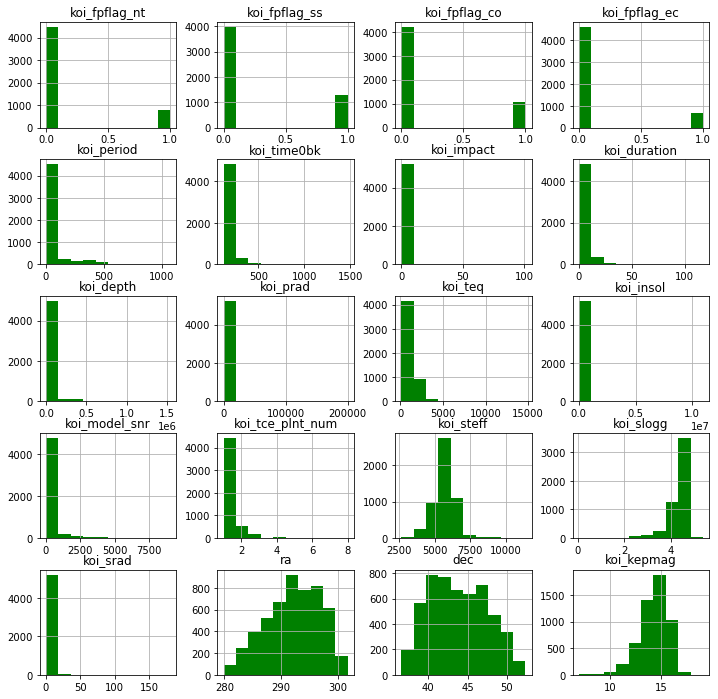

In [11]:
#Visual check for data balance
X_train.hist(figsize=(12,12), color='green')

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import LabelEncoder
#Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [14]:
#verify target shape is 1d
display(encoded_y_train.shape)

(5243,)

In [15]:
#verify label encoding
pd.DataFrame(encoded_y_train)[0].unique()

array([0, 1, 2])

# Train the Model



In [16]:
#create instance of utility and fit to training data
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train_scaled,encoded_y_train)

RandomForestClassifier()

In [17]:
print(f"Training Data Score: {rf.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9096109839816934


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [18]:
#Define Model Function to receive param grid
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier() 

In [19]:
# Create the GridSearchCV model
n_estimators = [75,100,125,150,175]
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
param_grid = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterion)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [20]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [75, 100, 125, 150, 175]})

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 175}
0.8971950171089853


# Test Tuned Model

In [23]:
rf=RandomForestClassifier(
    n_estimators = 175,
    max_features = 'sqrt',
    criterion = 'entropy'
)

rf.fit(X_train_scaled,encoded_y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=175)

In [24]:
print(f"Training Data Score: {rf.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9078947368421053


# Save the Model

In [26]:
import joblib
filename = 'random_forest_model_tuned.sav'
joblib.dump(rf, filename)

['random_forest_model_tuned.sav']